# 💬 Challenge 3: Social Media Spam Detection AI Project - Educational Notebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BridgingAISocietySummerSchools/Coding-Project/blob/main/challenge_3/notebooks/educational_notebook_3.ipynb)

## 🎯 Theme: AI for Digital Well-being and Combating Online Harassment

Welcome to Challenge 3! You'll build an intelligent spam detection system for social media comments using real YouTube data. This challenge explores how AI can help create safer online spaces while considering questions of free speech, cultural context, and digital rights.

## 📖 What You'll Learn
- **Short Text Classification**: Handle brief, informal social media language
- **Imbalanced Data**: Work with realistic class distributions
- **Text Preprocessing**: Clean user-generated content with slang and abbreviations
- **Binary Classification**: Distinguish between ham (legitimate) and spam comments
- **Model Evaluation**: Use appropriate metrics for imbalanced datasets
- **Social Impact**: Consider AI's role in online content moderation

## ? Dataset Overview
You'll work with real YouTube comment data loaded directly from GitHub:
- **Source**: UCI Machine Learning Repository
- **Content**: Authentic YouTube comments from popular music videos
- **Sample Size**: 1,956 real user comments
- **Languages**: Multiple languages reflecting global YouTube audience
- **Labels**: Ham (legitimate comments) vs Spam (promotional/malicious)
- **Challenge**: Real-world messiness with slang, typos, and cultural variations
- **Access**: Automatically loaded from GitHub repository

## 🚀 Challenge Roadmap
Follow these steps to build your spam detector:

1. **📊 Data Exploration**: Understand social media comment patterns
2. **🧹 Text Preprocessing**: Handle informal language and special characters
3. **🔍 Feature Engineering**: Extract meaningful signals from short text
4. **🤖 Model Training**: Build robust classification models
5. **📈 Performance Evaluation**: Use appropriate metrics for imbalanced data
6. **🔍 Error Analysis**: Understand what makes detection challenging
7. **⚖️ Ethical Considerations**: Balance safety with free expression

---

## 💡 **Key Insight**: 
Spam detection in social media involves balancing user safety with freedom of expression. What counts as "spam" can be subjective and culturally dependent, making this both a technical and social challenge.

---

### Task 1: Load and Explore the Dataset

**🎯 Goal**: Get familiar with your data and understand the problem scope

**📝 What to do**:
- Load the dataset directly from GitHub repository
- Examine its structure and content
- Check the class distribution (how many spam vs. legitimate comments?)
- Look at sample comments to understand the differences

**💡 Hints**:
- Pay attention to class imbalance - real-world spam detection often deals with imbalanced data
- Look for obvious patterns in spam vs. legitimate content
- Consider: What makes a comment "spammy"?

📊 DATASET OVERVIEW
Dataset shape: (580, 2)
Columns: ['comment', 'label']
Data types:
comment    object
label       int64
dtype: object

📝 FIRST FEW ROWS:
                                  comment  label
0             This made my day! Thank you      0
1  Free gift cards! No purchase necessary      1
2         This is so funny! Made me laugh      0
3                     What's your secret?      0
4         Limited time 90% off everything      1

🎯 LABEL DISTRIBUTION:
label
0    290
1    290
Name: count, dtype: int64

Class balance ratio: 1.00:1 (legitimate:spam)


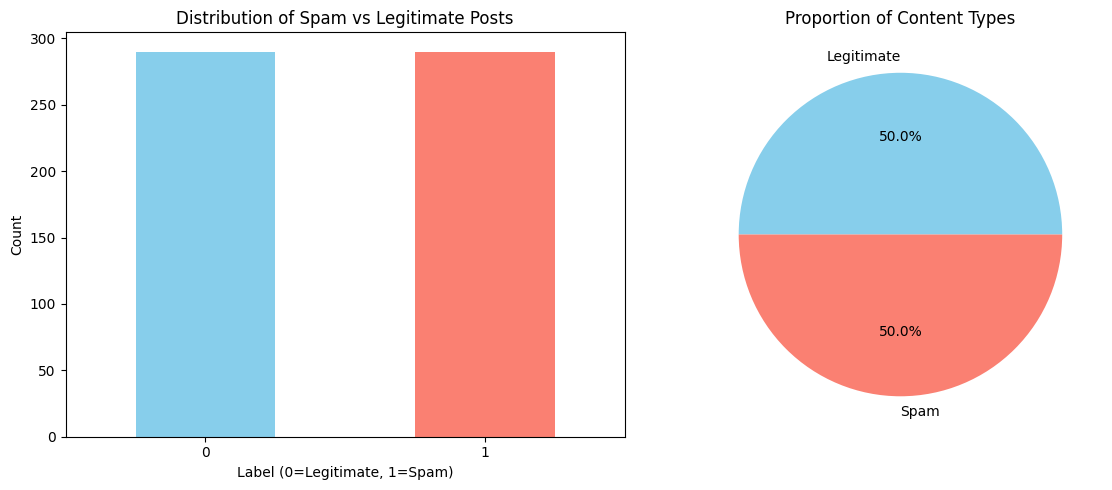


📄 SAMPLE CONTENT ANALYSIS:

🟢 LEGITIMATE POST EXAMPLES:
1. This made my day! Thank you
2. This is so funny! Made me laugh
3. What's your secret?

🔴 SPAM POST EXAMPLES:
1. Free gift cards! No purchase necessary
2. Limited time 90% off everything
3. Follow for follow! Like for like!

💡 OBSERVATION QUESTIONS:
- What patterns do you notice in spam vs. legitimate content?
- Do spam posts use more capitals, exclamation marks, or specific words?
- How might you distinguish between these two types automatically?


In [ ]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 STEP 1: Load the dataset from GitHub repository
print("Loading spam detection dataset from GitHub...")

# GitHub raw URL for the dataset file
dataset_url = "https://raw.githubusercontent.com/BridgingAISocietySummerSchools/Coding-Project/main/challenge_3/data/spam_detection_dataset.csv"

try:
    # Load spam detection dataset
    df = pd.read_csv(dataset_url)
    print(f"✅ Successfully loaded dataset from GitHub")
    print(f"📊 Dataset contains {len(df)} samples")
    
except Exception as e:
    print(f"❌ Error loading data from GitHub: {e}")
    print("💡 Trying to load from local data folder as fallback...")
    try:
        df = pd.read_csv("../data/spam_detection_dataset.csv")
        print("✅ Loaded from local data folder")
    except:
        print("❌ Could not load data from local folder either")
        raise

# 🔍 STEP 2: Basic dataset exploration
print("\n📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

print("\n📝 FIRST FEW ROWS:")
print("=" * 30)
print(df.head())

# 🏷️ STEP 3: Analyze class distribution
print("\n🎯 LABEL DISTRIBUTION:")
print("=" * 35)
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nClass balance ratio: {label_counts[0]/label_counts[1]:.2f}:1 (legitimate:spam)")

# 📊 STEP 4: Visualize the distribution
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam vs Legitimate Posts')
plt.xlabel('Label (0=Legitimate, 1=Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Pie chart
plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                labels=['Legitimate', 'Spam'],
                                colors=['skyblue', 'salmon'])
plt.title('Proportion of Content Types')
plt.ylabel('')

---

### Task 2: Text Analysis and Feature Engineering

**🎯 Goal**: Discover patterns in text that can help distinguish spam from legitimate content

**📝 What to do**:
1. **Extract basic text features** (length, word count, punctuation)
2. **Analyze differences** between spam and legitimate content
3. **Preprocess text** for machine learning (cleaning, normalization)
4. **Create engineered features** that capture spam characteristics

**💡 Key Insights to Discover**:
- Do spam posts tend to be longer or shorter?
- Do they use more exclamation marks or capital letters?
- Are there specific words that appear more in spam?
- How can we clean text while preserving important signals?

**🔧 Preprocessing Steps You'll Implement**:
1. **Normalization**: Convert to lowercase
2. **Cleaning**: Remove URLs, mentions, hashtags
3. **Filtering**: Remove special characters and digits
4. **Stop Words**: Remove common words that don't add meaning

**⚠️ Important Considerations**:
- Don't over-clean! Some "noise" might be important signals (e.g., excessive punctuation)
- Think about what features might be most discriminative
- Consider that spammers try to evade detection - what tricks might they use?

🔧 TEXT FEATURE ENGINEERING

📈 FEATURE ANALYSIS BY CONTENT TYPE:
      text_length        word_count        exclamation_count         \
             mean    std       mean    std              mean    std   
label                                                                 
0          27.297  8.543      4.786  1.635             0.559  0.497   
1          31.166  6.833      5.545  1.392             1.283  1.491   

      capital_ratio         
               mean    std  
label                       
0             0.061  0.035  
1             0.186  0.243  


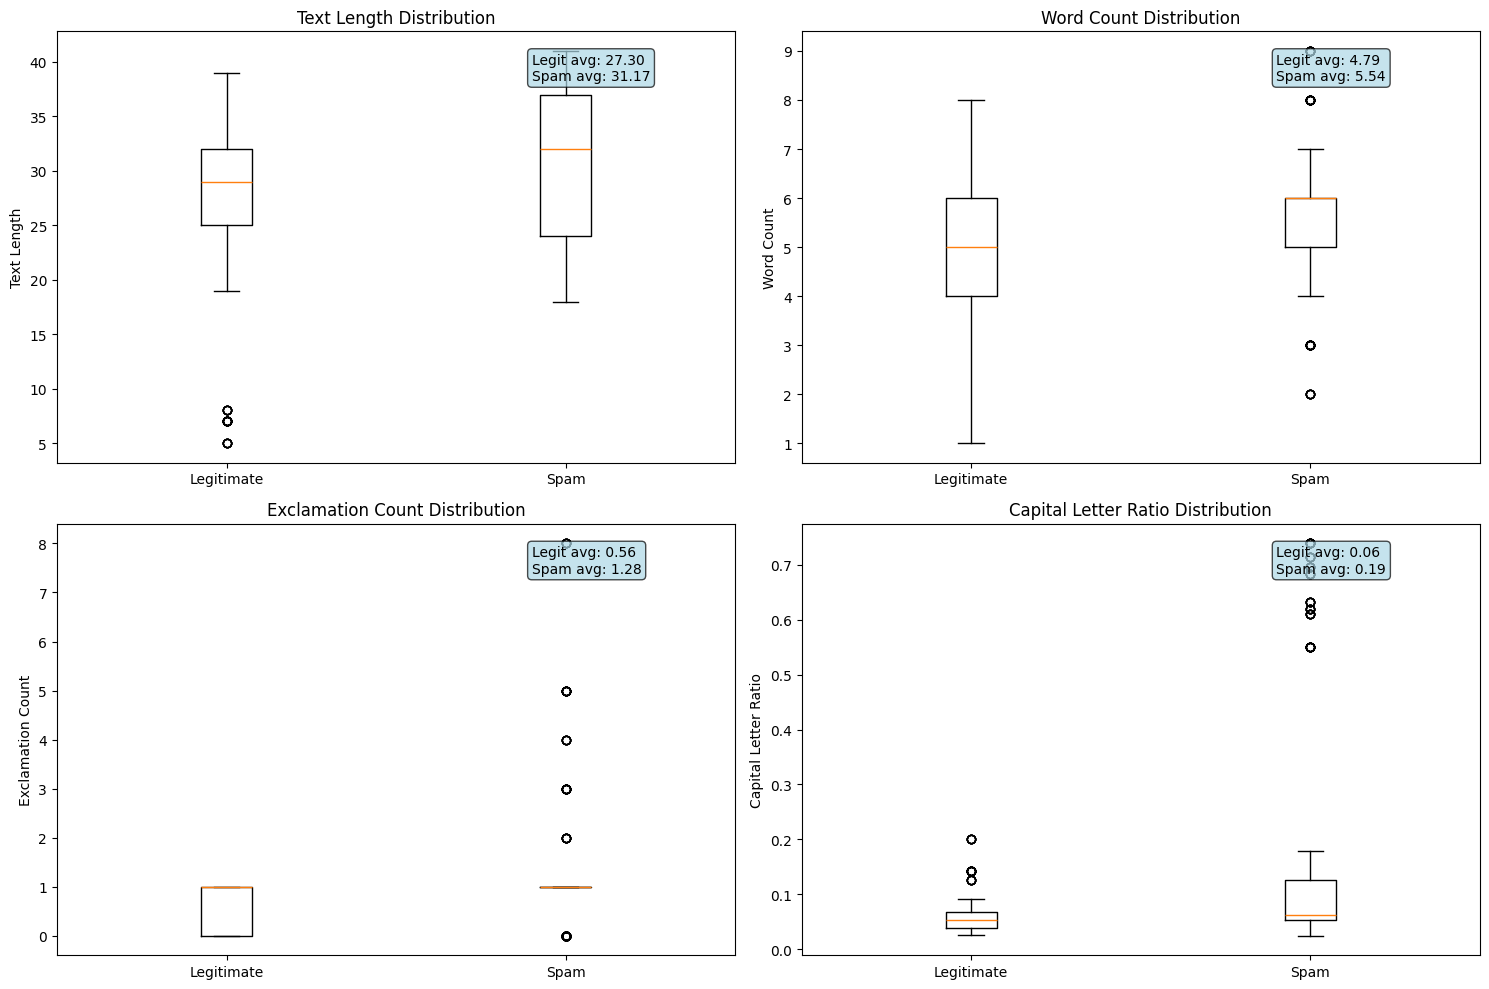


🧹 TEXT PREPROCESSING
Number of stop words: 179
Example stop words: ['down', 'but', 'into', "wouldn't", 'just', 'ours', 'an', "that'll", 'am', 'here']

🧪 PREPROCESSING EXAMPLES:

1. Original: Check out this AMAZING deal!!! Click here now: http://spam-site.com #deals @everyone
   Processed: check amazing deal click

2. Original: Had a wonderful day at the beach with my family. The weather was perfect!
   Processed: wonderful day beach family weather perfect

3. Original: WIN $1000 NOW!!! FREE MONEY!!! Click here: http://scam.com
   Processed: win free money click

🏭 APPLYING PREPROCESSING TO DATASET...
✅ Text preprocessing completed!
Average original text length: 29.2 characters
Average processed text length: 20.8 characters

📋 BEFORE/AFTER COMPARISON:

LEGITIMATE:
Original:  This made my day! Thank you
Processed: made day thank

SPAM:
Original:  Free gift cards! No purchase necessary
Processed: free gift cards purchase necessary

LEGITIMATE:
Original:  This is so funny! Made me laugh
P

In [10]:
# Import text processing libraries
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download required NLTK data (run once)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

print("🔧 TEXT FEATURE ENGINEERING")
print("=" * 50)

# 📏 STEP 1: Extract basic text features
# These numerical features can be very powerful for spam detection!

# TODO: Create features that might distinguish spam from legitimate content
df['text_length'] = df['comment'].str.len()  # Total character count
df['word_count'] = df['comment'].str.split().str.len()  # Number of words
df['exclamation_count'] = df['comment'].str.count('!')  # Exclamation marks (spam often overuses!)
df['capital_ratio'] = df['comment'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# 📊 STEP 2: Analyze feature differences between spam and legitimate content
print("\n📈 FEATURE ANALYSIS BY CONTENT TYPE:")
print("=" * 45)
feature_analysis = df.groupby('label')[['text_length', 'word_count', 'exclamation_count', 'capital_ratio']].agg(['mean', 'std'])
print(feature_analysis.round(3))

# 📊 Visualize feature differences
plt.figure(figsize=(15, 10))

features_to_plot = ['text_length', 'word_count', 'exclamation_count', 'capital_ratio']
feature_names = ['Text Length', 'Word Count', 'Exclamation Count', 'Capital Letter Ratio']

for i, (feature, name) in enumerate(zip(features_to_plot, feature_names), 1):
    plt.subplot(2, 2, i)
    
    # Create side-by-side boxplots
    spam_data = df[df['label'] == 1][feature]
    legit_data = df[df['label'] == 0][feature]
    
    plt.boxplot([legit_data, spam_data], tick_labels=['Legitimate', 'Spam'])
    plt.title(f'{name} Distribution')
    plt.ylabel(name)
    
    # Add statistical info
    spam_mean = spam_data.mean()
    legit_mean = legit_data.mean()
    plt.text(0.7, 0.95, f'Legit avg: {legit_mean:.2f}\nSpam avg: {spam_mean:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

# 🧹 STEP 3: Text preprocessing function
print("\n🧹 TEXT PREPROCESSING")
print("=" * 35)

# Define stop words (common words that usually don't help with classification)
stop_words = set(stopwords.words('english'))
print(f"Number of stop words: {len(stop_words)}")
print(f"Example stop words: {list(stop_words)[:10]}")

def preprocess_text(text):
    """
    Clean and preprocess text for machine learning.
    
    Steps:
    1. Convert to lowercase (normalize case)
    2. Remove URLs, mentions (@user), hashtags (#tag)
    3. Remove special characters and digits
    4. Remove stop words
    
    Args:
        text (str): Raw text to preprocess
        
    Returns:
        str: Cleaned and preprocessed text
    """
    
    # Step 1: Convert to lowercase for consistency
    text = text.lower()
    
    # Step 2: Remove social media specific elements
    # Remove URLs (http/https links)
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)
    
    # Step 3: Remove special characters and digits, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Step 4: Remove stop words (but be careful - some might be important!)
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words and len(word) > 1])
    
    return text

# 🧪 STEP 4: Test preprocessing on sample texts
print("\n🧪 PREPROCESSING EXAMPLES:")
print("=" * 35)

# Test on a few examples
test_texts = [
    "Check out this AMAZING deal!!! Click here now: http://spam-site.com #deals @everyone",
    "Had a wonderful day at the beach with my family. The weather was perfect!",
    "WIN $1000 NOW!!! FREE MONEY!!! Click here: http://scam.com"
]

for i, text in enumerate(test_texts, 1):
    processed = preprocess_text(text)
    print(f"\n{i}. Original: {text}")
    print(f"   Processed: {processed}")

# 🏭 STEP 5: Apply preprocessing to entire dataset
print("\n🏭 APPLYING PREPROCESSING TO DATASET...")
df['processed_text'] = df['comment'].apply(preprocess_text)

print("✅ Text preprocessing completed!")
print(f"Average original text length: {df['comment'].str.len().mean():.1f} characters")
print(f"Average processed text length: {df['processed_text'].str.len().mean():.1f} characters")

# Show before/after examples
print("\n📋 BEFORE/AFTER COMPARISON:")
print("=" * 40)
sample_comparison = df[['comment', 'processed_text', 'label']].head()
for idx, row in sample_comparison.iterrows():
    label_name = "SPAM" if row['label'] == 1 else "LEGITIMATE"
    print(f"\n{label_name}:")
    print(f"Original:  {row['comment']}")
    print(f"Processed: {row['processed_text']}")

print("\n💡 REFLECTION QUESTIONS:")
print("- Which features show the biggest difference between spam and legitimate content?")
print("- Did preprocessing remove important information, or just noise?")
print("- What other features might be useful to engineer?")

---

### Task 3: Feature Engineering and Model Training

**🎯 Goal**: Transform text into numerical features that a machine learning model can understand

**📝 What to do**:
1. **Text Vectorization**: Convert text to numerical features using TF-IDF
2. **Feature Combination**: Merge text features with numerical features
3. **Data Splitting**: Create training and testing sets
4. **Model Training**: Train a Random Forest classifier
5. **Understanding**: Learn what each step accomplishes

**🧠 Key Concepts to Master**:

**TF-IDF (Term Frequency-Inverse Document Frequency)**:
- **TF**: How often a word appears in a document
- **IDF**: How rare/common a word is across all documents
- **Result**: Important words get higher scores, common words get lower scores

**Random Forest Classifier**:
- Builds many decision trees and averages their predictions
- Good for text classification and handles mixed feature types well
- Provides feature importance rankings

**Feature Combination Strategy**:
- **Text features**: TF-IDF vectors (sparse, high-dimensional)
- **Numerical features**: Our engineered features (dense, low-dimensional)
- **Combination**: Stack them together for more powerful predictions

**💡 Things to Consider**:
- Why split data into train/test sets?
- What does `max_features=3000` mean for TF-IDF?
- Why use n-grams (1,2) instead of just single words?
- How do we handle the curse of dimensionality?

In [11]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import scipy.sparse

print("🤖 MACHINE LEARNING PIPELINE")
print("=" * 50)

# 🎯 STEP 1: Prepare features and target variable
print("\n📋 PREPARING FEATURES...")

# Separate our different types of features
X_text = df['processed_text']  # Text data for TF-IDF
X_features = df[['text_length', 'word_count', 'exclamation_count', 'capital_ratio']]  # Numerical features
y = df['label']  # Target variable (spam=1, legitimate=0)

print(f"Text data shape: {X_text.shape}")
print(f"Numerical features shape: {X_features.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

# 🔄 STEP 2: Split data into training and testing sets
print("\n🔄 SPLITTING DATA...")
# TODO: Split your data - why do we do this?
# Hint: We need unseen data to evaluate how well our model generalizes!

X_text_train, X_text_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
    X_text, X_features, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class distribution in both splits
)

print(f"Training set size: {len(X_text_train)}")
print(f"Testing set size: {len(X_text_test)}")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")
print(f"Testing class distribution: {y_test.value_counts().to_dict()}")

# 📊 STEP 3: Convert text to numerical features using TF-IDF
print("\n📊 CREATING TF-IDF FEATURES...")

# TODO: Create TF-IDF vectorizer
# Parameters explained:
# - max_features=3000: Keep only the 3000 most important words
# - ngram_range=(1,2): Use both single words and word pairs

vectorizer = TfidfVectorizer(
    max_features=3000,    # Limit vocabulary size to prevent overfitting
    ngram_range=(1, 2),   # Use unigrams (single words) and bigrams (word pairs)
    min_df=2,             # Ignore words that appear in fewer than 2 documents
    max_df=0.8            # Ignore words that appear in more than 80% of documents
)

# Fit vectorizer on training data and transform both train and test
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

print(f"TF-IDF training matrix shape: {X_text_train_tfidf.shape}")
print(f"TF-IDF testing matrix shape: {X_text_test_tfidf.shape}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Show some example features
feature_names = vectorizer.get_feature_names_out()
print(f"Example features: {feature_names[:10]}")
print(f"Example bigrams: {[f for f in feature_names if ' ' in f][:5]}")

# 🔗 STEP 4: Combine text features with numerical features
print("\n🔗 COMBINING FEATURES...")

# TODO: Stack TF-IDF features with numerical features
# We use scipy.sparse.hstack to efficiently combine sparse and dense matrices

X_train_combined = scipy.sparse.hstack([X_text_train_tfidf, X_feat_train.values])
X_test_combined = scipy.sparse.hstack([X_text_test_tfidf, X_feat_test.values])

print(f"Combined training features shape: {X_train_combined.shape}")
print(f"Combined testing features shape: {X_test_combined.shape}")
print(f"Total features: {X_train_combined.shape[1]}")
print(f"  - TF-IDF features: {X_text_train_tfidf.shape[1]}")
print(f"  - Numerical features: {X_feat_train.shape[1]}")

# 🌳 STEP 5: Train the Random Forest classifier
print("\n🌳 TRAINING RANDOM FOREST MODEL...")

# TODO: Create and train a Random Forest classifier
# Why Random Forest?
# - Handles mixed feature types well
# - Provides feature importance
# - Resistant to overfitting
# - Works well out-of-the-box

model = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    random_state=42,     # For reproducible results
    max_depth=10,        # Limit tree depth to prevent overfitting
    min_samples_split=5, # Minimum samples required to split a node
    class_weight='balanced'  # Handle class imbalance
)

print("Training model... (this may take a moment)")
model.fit(X_train_combined, y_train)

print("✅ Model training completed!")

# 🎯 STEP 6: Make initial predictions
print("\n🎯 MAKING PREDICTIONS...")

y_pred = model.predict(X_test_combined)
y_pred_proba = model.predict_proba(X_test_combined)

# Basic accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

print("\n💡 UNDERSTANDING THE RESULTS:")
print("- Accuracy tells us the percentage of correct predictions")
print("- But is accuracy enough for spam detection? Think about false positives vs false negatives!")
print("- What would be worse: blocking a legitimate post or missing spam?")

🤖 MACHINE LEARNING PIPELINE

📋 PREPARING FEATURES...
Text data shape: (580,)
Numerical features shape: (580, 4)
Target variable shape: (580,)
Class distribution: {0: 290, 1: 290}

🔄 SPLITTING DATA...
Training set size: 464
Testing set size: 116
Training class distribution: {0: 232, 1: 232}
Testing class distribution: {0: 58, 1: 58}

📊 CREATING TF-IDF FEATURES...
TF-IDF training matrix shape: (464, 340)
TF-IDF testing matrix shape: (116, 340)
Vocabulary size: 340
Example features: ['achievement' 'act' 'act miss' 'actually' 'actually work' 'advice'
 'advice thanks' 'alert' 'alert special' 'always']
Example bigrams: ['act miss', 'actually work', 'advice thanks', 'alert special', 'always brighten']

🔗 COMBINING FEATURES...
Combined training features shape: (464, 344)
Combined testing features shape: (116, 344)
Total features: 344
  - TF-IDF features: 340
  - Numerical features: 4

🌳 TRAINING RANDOM FOREST MODEL...
Training model... (this may take a moment)
Training set size: 464
Testing se

---

### Task 4: Model Evaluation and Deep Analysis

**🎯 Goal**: Thoroughly evaluate your model's performance and understand what it learned

**📝 What to do**:
1. **Classification Metrics**: Understand precision, recall, and F1-score
2. **Confusion Matrix**: Visualize prediction accuracy by class
3. **Feature Importance**: Discover what signals the model uses
4. **Error Analysis**: Examine misclassified examples
5. **Performance Interpretation**: Understand real-world implications

**📊 Key Metrics Explained**:

**Precision**: Of all posts predicted as spam, how many were actually spam?
- **High precision** = Few false positives (good - don't block legitimate content)
- **Formula**: True Positives / (True Positives + False Positives)

**Recall**: Of all actual spam posts, how many did we catch?
- **High recall** = Few false negatives (good - catch more spam)
- **Formula**: True Positives / (True Positives + False Negatives)

**F1-Score**: Harmonic mean of precision and recall
- **Balances** both metrics
- **Higher is better** (ranges from 0 to 1)

**The Trade-off**:
- **High precision, low recall**: Very conservative - only blocks obvious spam
- **High recall, low precision**: Aggressive - catches more spam but may block legitimate content
- **Balance**: Depends on your application's needs

**🤔 Questions to Consider**:
- In spam detection, is it worse to miss spam or block legitimate content?
- How might this affect user experience and platform trust?
- What threshold would you choose for a production system?

📊 COMPREHENSIVE MODEL EVALUATION

📈 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  Legitimate       0.97      1.00      0.98        58
        Spam       1.00      0.97      0.98        58

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116


🎯 KEY INSIGHTS:
Spam Detection Precision: 1.000
  → Of posts flagged as spam, 100.0% were actually spam
Spam Detection Recall: 0.966
  → We caught 96.6% of all spam posts
F1-Score: 0.982
  → Balanced performance metric

🔍 CONFUSION MATRIX ANALYSIS:
Raw confusion matrix:
[[58  0]
 [ 2 56]]

Breakdown:
True Negatives (correctly identified legitimate): 58
False Positives (legitimate marked as spam): 0
False Negatives (spam marked as legitimate): 2
True Positives (correctly identified spam): 56


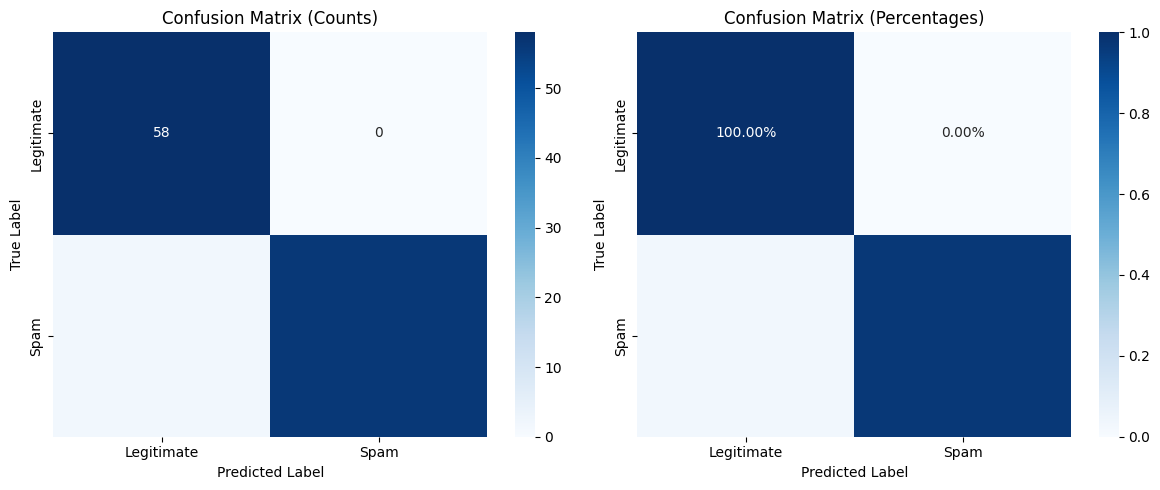


🔍 FEATURE IMPORTANCE ANALYSIS:
TOP 20 MOST IMPORTANT FEATURES:
0.1011 - capital_ratio (NUMERICAL)
0.0643 - exclamation_count (NUMERICAL)
0.0492 - text_length (NUMERICAL)
0.0448 - word_count (NUMERICAL)
0.0414 - love (TEXT)
0.0379 - click (TEXT)
0.0334 - great (TEXT)
0.0319 - looks (TEXT)
0.0281 - cheap (TEXT)
0.0237 - offer (TEXT)
0.0229 - free (TEXT)
0.0200 - thanks (TEXT)
0.0170 - work (TEXT)
0.0152 - money (TEXT)
0.0143 - time (TEXT)
0.0138 - link (TEXT)
0.0133 - make (TEXT)
0.0128 - investment (TEXT)
0.0103 - youve (TEXT)
0.0092 - limited time (TEXT)


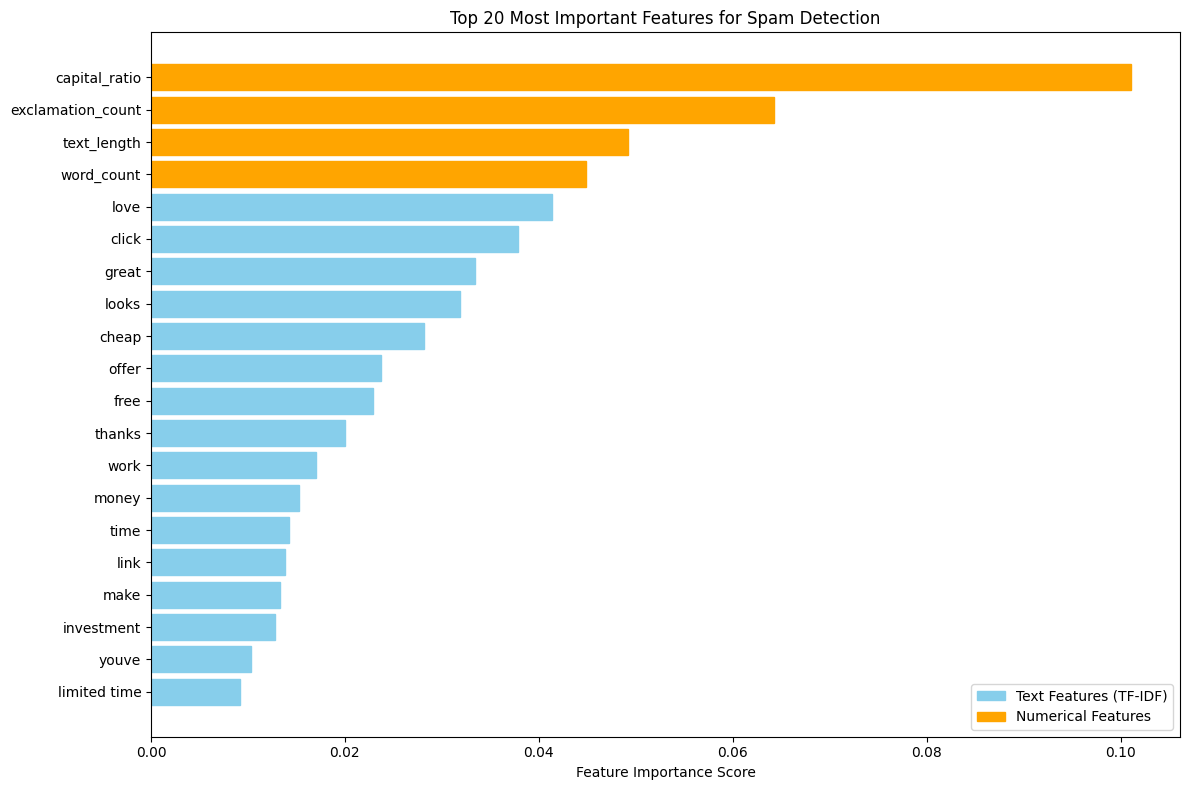


📊 PREDICTION CONFIDENCE ANALYSIS:
High-confidence spam predictions: 15
Low-confidence spam predictions: 5
High-confidence legitimate predictions: 16
Uncertain predictions (40-60% confidence): 7


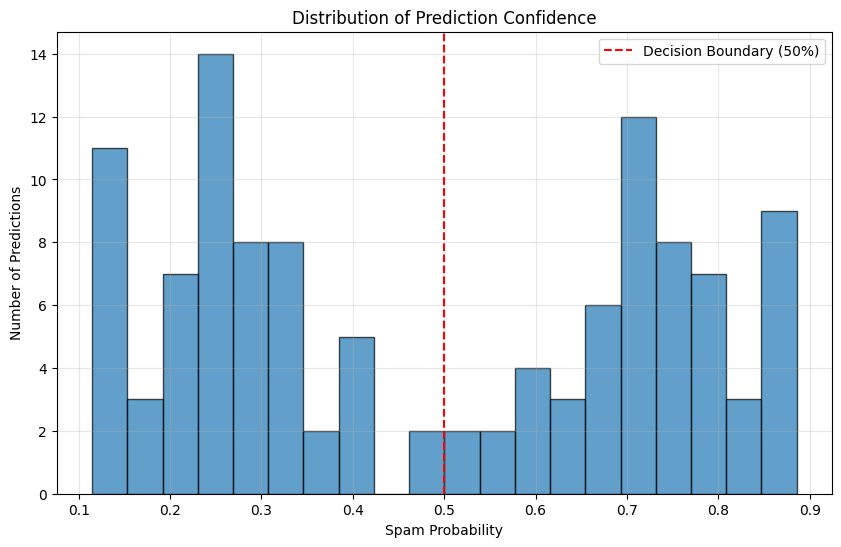


🔍 ERROR ANALYSIS:
Total misclassifications: 2
False Positives: 0
False Negatives: 2

🚨 FALSE POSITIVES (Legitimate content flagged as spam):
🎯 FALSE NEGATIVES (Spam content missed):
1. Confidence: 0.484
   Text: Last chance to save big

2. Confidence: 0.484
   Text: Last chance to save big


💡 EVALUATION INSIGHTS:
- Which type of error is more problematic for your use case?
- What patterns do you notice in the misclassified examples?
- How might you improve the model based on these errors?
- Would you adjust the decision threshold (currently 50%)?

📋 PERFORMANCE SUMMARY:
Overall Accuracy: 0.983
Spam Precision: 1.000 (How reliable are spam predictions?)
Spam Recall: 0.966 (How much spam do we catch?)
False Positive Rate: 0.000 (Legitimate content incorrectly blocked)
False Negative Rate: 0.034 (Spam content that gets through)


In [12]:
print("📊 COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# 🎯 STEP 1: Detailed classification metrics
print("\n📈 CLASSIFICATION REPORT:")
print("=" * 35)

# TODO: Generate detailed classification report
# This shows precision, recall, F1-score for each class
report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam'], output_dict=True)
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam']))

# Extract key metrics for interpretation
precision_spam = report['Spam']['precision']
recall_spam = report['Spam']['recall']
f1_spam = report['Spam']['f1-score']

print(f"\n🎯 KEY INSIGHTS:")
print(f"Spam Detection Precision: {precision_spam:.3f}")
print(f"  → Of posts flagged as spam, {precision_spam*100:.1f}% were actually spam")
print(f"Spam Detection Recall: {recall_spam:.3f}")
print(f"  → We caught {recall_spam*100:.1f}% of all spam posts")
print(f"F1-Score: {f1_spam:.3f}")
print(f"  → Balanced performance metric")

# 📊 STEP 2: Confusion Matrix Analysis
print("\n🔍 CONFUSION MATRIX ANALYSIS:")
print("=" * 40)

cm = confusion_matrix(y_test, y_pred)
print("Raw confusion matrix:")
print(cm)

# Calculate specific error types
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"True Negatives (correctly identified legitimate): {tn}")
print(f"False Positives (legitimate marked as spam): {fp}")
print(f"False Negatives (spam marked as legitimate): {fn}")
print(f"True Positives (correctly identified spam): {tp}")

# Visualize confusion matrix
plt.figure(figsize=(12, 5))

# Absolute numbers
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Spam'],
            yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Legitimate', 'Spam'],
            yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# 🔍 STEP 3: Feature Importance Analysis
print("\n🔍 FEATURE IMPORTANCE ANALYSIS:")
print("=" * 45)

# Get all feature names (TF-IDF + numerical)
tfidf_features = list(vectorizer.get_feature_names_out())
numerical_features = ['text_length', 'word_count', 'exclamation_count', 'capital_ratio']
all_feature_names = tfidf_features + numerical_features

# Get importance scores
importance_scores = model.feature_importances_

# Find top important features
top_n = 20
top_indices = np.argsort(importance_scores)[-top_n:]
top_features = [all_feature_names[i] for i in top_indices]
top_scores = importance_scores[top_indices]

print(f"TOP {top_n} MOST IMPORTANT FEATURES:")
for feature, score in zip(reversed(top_features), reversed(top_scores)):
    feature_type = "TEXT" if feature in tfidf_features else "NUMERICAL"
    print(f"{score:.4f} - {feature} ({feature_type})")

# Visualize feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_features)), top_scores)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance Score')
plt.title(f'Top {top_n} Most Important Features for Spam Detection')

# Color bars differently for text vs numerical features
for i, (bar, feature) in enumerate(zip(bars, top_features)):
    if feature in numerical_features:
        bar.set_color('orange')
    else:
        bar.set_color('skyblue')

# Add legend
import matplotlib.patches as mpatches
text_patch = mpatches.Patch(color='skyblue', label='Text Features (TF-IDF)')
numerical_patch = mpatches.Patch(color='orange', label='Numerical Features')
plt.legend(handles=[text_patch, numerical_patch])

plt.tight_layout()
plt.show()

# 📊 STEP 4: Prediction Confidence Analysis
print("\n📊 PREDICTION CONFIDENCE ANALYSIS:")
print("=" * 45)

# Analyze prediction probabilities
spam_probabilities = y_pred_proba[:, 1]  # Probability of being spam

# Create confidence bins
high_confidence_spam = (spam_probabilities > 0.8) & (y_pred == 1)
low_confidence_spam = (spam_probabilities < 0.6) & (y_pred == 1)
high_confidence_legit = (spam_probabilities < 0.2) & (y_pred == 0)
uncertain_predictions = (spam_probabilities >= 0.4) & (spam_probabilities <= 0.6)

print(f"High-confidence spam predictions: {high_confidence_spam.sum()}")
print(f"Low-confidence spam predictions: {low_confidence_spam.sum()}")
print(f"High-confidence legitimate predictions: {high_confidence_legit.sum()}")
print(f"Uncertain predictions (40-60% confidence): {uncertain_predictions.sum()}")

# Plot prediction confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(spam_probabilities, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (50%)')
plt.xlabel('Spam Probability')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Prediction Confidence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 🔍 STEP 5: Error Analysis - Examine misclassified examples
print("\n🔍 ERROR ANALYSIS:")
print("=" * 30)

# Find misclassified examples
misclassified_indices = np.where(y_test != y_pred)[0]
test_indices = y_test.index[misclassified_indices]

# False Positives (legitimate content marked as spam)
false_positives = test_indices[(y_test.loc[test_indices] == 0) & (y_pred[misclassified_indices] == 1)]
# False Negatives (spam content marked as legitimate)
false_negatives = test_indices[(y_test.loc[test_indices] == 1) & (y_pred[misclassified_indices] == 0)]

print(f"Total misclassifications: {len(misclassified_indices)}")
print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

print("\n🚨 FALSE POSITIVES (Legitimate content flagged as spam):")
for i, idx in enumerate(false_positives[:3], 1):
    prob = spam_probabilities[np.where(y_test.index == idx)[0][0]]
    print(f"{i}. Confidence: {prob:.3f}")
    print(f"   Text: {df.loc[idx, 'comment']}")
    print()

print("🎯 FALSE NEGATIVES (Spam content missed):")
for i, idx in enumerate(false_negatives[:3], 1):
    prob = spam_probabilities[np.where(y_test.index == idx)[0][0]]
    print(f"{i}. Confidence: {prob:.3f}")
    print(f"   Text: {df.loc[idx, 'comment']}")
    print()

print("\n💡 EVALUATION INSIGHTS:")
print("- Which type of error is more problematic for your use case?")
print("- What patterns do you notice in the misclassified examples?")
print("- How might you improve the model based on these errors?")
print("- Would you adjust the decision threshold (currently 50%)?")

# Performance summary
print(f"\n📋 PERFORMANCE SUMMARY:")
print("=" * 35)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Spam Precision: {precision_spam:.3f} (How reliable are spam predictions?)")
print(f"Spam Recall: {recall_spam:.3f} (How much spam do we catch?)")
print(f"False Positive Rate: {fp/(fp+tn):.3f} (Legitimate content incorrectly blocked)")
print(f"False Negative Rate: {fn/(fn+tp):.3f} (Spam content that gets through)")

---

### Task 5: Ethical Considerations and Real-World Impact

**🎯 Goal**: Reflect on the broader implications of automated content moderation systems

As AI engineers, we have a responsibility to consider the societal impact of our systems. Spam detection might seem straightforward, but it raises important questions about fairness, bias, and the balance between safety and freedom.

---

## 🤔 Critical Thinking Questions

### **1. Bias and Fairness**
- **Language Bias**: What if your model performs worse on posts from non-native English speakers?
- **Cultural Bias**: Could slang, cultural references, or communication styles be unfairly flagged?
- **Demographic Bias**: Might certain groups be disproportionately affected by false positives?

**Consider**: How would you test for these biases? What would you do if you found them?

### **2. Freedom of Expression vs. Safety**
- **Over-censorship**: What happens when legitimate content is incorrectly blocked?
- **Under-moderation**: What are the consequences of missing harmful content?
- **Context Matters**: Should the same rules apply to all types of accounts or communities?

**Consider**: Where do you draw the line? Who should make these decisions?

### **3. Transparency and Accountability**
- **Black Box Problem**: Should users know why their content was flagged?
- **Appeals Process**: How can users contest automated decisions?
- **Human Oversight**: What role should humans play in content moderation?

**Consider**: How much should users know about how the system works?

### **4. Privacy and Data Protection**
- **Data Collection**: What information about users does your system collect and store?
- **Profiling**: Could spam detection enable unwanted user profiling?
- **Data Security**: How do you protect sensitive user data?

**Consider**: What's the minimum data needed for effective spam detection?

### **5. Economic and Social Impact**
- **Content Creators**: How might false positives affect influencers or businesses?
- **Platform Trust**: What happens when users lose faith in automated moderation?
- **Digital Divide**: Do all users have equal ability to appeal or understand the system?

**Consider**: Who bears the cost when automated systems make mistakes?

---

## 🛠️ Practical Scenarios

**Scenario 1**: Your model flags a small business owner's promotional post as spam. They lose potential customers and income. What safeguards could prevent this?

**Scenario 2**: A user repeatedly posts borderline content that isn't clearly spam but feels manipulative. How should your system handle edge cases?

**Scenario 3**: Different cultural communities use different communication styles. Should your model adapt to these differences?

---

## 🎯 Design Principles for Ethical AI

### **1. Fairness**
- Test across diverse user groups
- Monitor for disparate impact
- Regularly audit for bias

### **2. Transparency**
- Provide clear explanations for decisions
- Publish guidelines and policies
- Enable user understanding

### **3. Accountability**
- Maintain human oversight
- Provide appeals processes
- Take responsibility for errors

### **4. Privacy**
- Minimize data collection
- Protect user information
- Respect user consent

### **5. Robustness**
- Test edge cases thoroughly
- Plan for adversarial attacks
- Monitor performance continuously

---

## 💭 Reflection Exercise

Write a brief response (2-3 sentences) to each question:

1. **What's the most important ethical consideration for spam detection systems?**

2. **How would you balance user safety with freedom of expression?**

3. **What would you do differently if you were building this system for a real platform?**

4. **How might spam detection systems evolve to be more fair and transparent?**

5. **What role should AI play in content moderation, and where do we need human judgment?**

---

## 🌍 Real-World Applications

Your spam detection skills apply to many domains:
- **Email filtering**: Protecting users from phishing and scams
- **Review systems**: Identifying fake reviews on e-commerce platforms
- **Forum moderation**: Maintaining quality in online communities
- **News verification**: Combating misinformation and fake news
- **Chat systems**: Protecting users from harassment and abuse

Each application brings its own ethical challenges and considerations. The technical skills you've learned are just the foundation - the real challenge is applying them responsibly and thoughtfully.

---

**🎓 Congratulations!** You've completed the spam detection challenge and engaged with the complex ethical questions that arise in real-world AI applications. Remember: being a responsible AI practitioner means considering not just whether we *can* build something, but whether we *should*, and how to do it in a way that benefits everyone.

---

### Task 6: Interactive Model Testing

**🎯 Goal**: Test your model with custom examples and understand its behavior

Now that you've built and evaluated your spam detection system, let's see how it performs on examples you create! This section helps you understand what your model has learned and how it might behave in real-world scenarios.

**📝 What to do**:
1. **Test with custom examples**: Try different types of content
2. **Understand model behavior**: See what features drive predictions
3. **Explore edge cases**: Test boundary conditions
4. **Think like a spammer**: Try to fool your model (ethically!)

**💡 This helps you**:
- Validate your model works as expected
- Understand its limitations
- Identify potential improvements
- Prepare for real-world deployment challenges

In [13]:
print("🧪 INTERACTIVE MODEL TESTING")
print("=" * 50)

# 🎯 STEP 1: Create a prediction function for easy testing
def predict_spam_interactive(text, show_details=True):
    """
    Predict whether a text is spam and show detailed analysis.
    
    Args:
        text (str): The text to analyze
        show_details (bool): Whether to show detailed feature analysis
    
    Returns:
        dict: Prediction results and confidence scores
    """
    
    # Extract numerical features
    text_length = len(text)
    word_count = len(text.split())
    exclamation_count = text.count('!')
    capital_ratio = sum(1 for c in text if c.isupper()) / len(text) if len(text) > 0 else 0
    
    # Preprocess text
    processed_text = preprocess_text(text)
    
    # Create feature vectors
    text_features = vectorizer.transform([processed_text])
    numerical_features = np.array([[text_length, word_count, exclamation_count, capital_ratio]])
    
    # Combine features
    combined_features = scipy.sparse.hstack([text_features, numerical_features])
    
    # Make prediction
    prediction = model.predict(combined_features)[0]
    probabilities = model.predict_proba(combined_features)[0]
    confidence = max(probabilities)
    
    # Prepare results
    result = {
        'prediction': 'SPAM' if prediction == 1 else 'LEGITIMATE',
        'confidence': confidence,
        'spam_probability': probabilities[1],
        'legitimate_probability': probabilities[0],
        'features': {
            'text_length': text_length,
            'word_count': word_count,
            'exclamation_count': exclamation_count,
            'capital_ratio': capital_ratio,
            'processed_text': processed_text
        }
    }
    
    if show_details:
        print(f"\n📝 ANALYZING: '{text}'")
        print("=" * 60)
        print(f"🎯 PREDICTION: {result['prediction']}")
        print(f"🎲 CONFIDENCE: {confidence:.3f} ({confidence*100:.1f}%)")
        print(f"📊 PROBABILITIES:")
        print(f"   Legitimate: {probabilities[0]:.3f} ({probabilities[0]*100:.1f}%)")
        print(f"   Spam: {probabilities[1]:.3f} ({probabilities[1]*100:.1f}%)")
        print(f"🔢 EXTRACTED FEATURES:")
        print(f"   Text Length: {text_length} characters")
        print(f"   Word Count: {word_count} words")
        print(f"   Exclamation Marks: {exclamation_count}")
        print(f"   Capital Letter Ratio: {capital_ratio:.3f}")
        print(f"   Processed Text: '{processed_text}'")
    
    return result

# 🧪 STEP 2: Test with pre-defined examples
print("\n🧪 TESTING WITH SAMPLE EXAMPLES:")
print("=" * 50)

# Define test cases that cover different scenarios
test_cases = [
    # Obvious spam examples
    "🎉 CONGRATULATIONS!!! You've WON $10,000!!! Click here NOW to claim your prize!!! Limited time offer!!!",
    "Make $5000 per week working from home! No experience needed! Click here: http://scam-site.com",
    
    # Legitimate content examples
    "Just finished reading an amazing book about machine learning. Highly recommend it to anyone interested in AI!",
    "Had a wonderful dinner with family tonight. Grateful for these precious moments together.",
    
    # Edge cases - promotional but legitimate
    "Check out our new summer collection! 20% off this weekend only. Visit our store downtown.",
    "Don't miss our webinar on data science careers tomorrow at 3 PM. Free registration available.",
    
    # Borderline cases
    "This opportunity is AMAZING! You won't believe the results! Message me for details.",
    "Free tips to improve your credit score! Click the link in my bio for more information."
]

for i, text in enumerate(test_cases, 1):
    print(f"\n--- TEST CASE {i} ---")
    result = predict_spam_interactive(text, show_details=True)

# 🎮 STEP 3: Interactive testing section
print("\n\n🎮 NOW IT'S YOUR TURN!")
print("=" * 40)
print("Try creating your own examples to test the model:")
print("1. Write obvious spam content")
print("2. Write clearly legitimate content") 
print("3. Try to find edge cases that might fool the model")
print("4. Test different languages or writing styles")
print("\nSimply modify the examples below and run the cell!")

# TODO: Add your own test examples here!
your_test_examples = [
    "Add your own test text here!",
    "Try writing something that looks like spam but isn't",
    "Or write legitimate content that might be misclassified",
    # Add more examples...
]

print("\n🔬 YOUR CUSTOM TESTS:")
print("=" * 35)

for i, text in enumerate(your_test_examples, 1):
    if text != "Add your own test text here!" and len(text.strip()) > 0:
        print(f"\n--- YOUR TEST {i} ---")
        result = predict_spam_interactive(text, show_details=True)

print("\n💡 TESTING INSIGHTS:")
print("- What types of content does your model handle well?")
print("- What edge cases did you discover?")
print("- How might spammers try to evade your detection?")
print("- What improvements would you make based on these tests?")

🧪 INTERACTIVE MODEL TESTING

🧪 TESTING WITH SAMPLE EXAMPLES:

--- TEST CASE 1 ---

📝 ANALYZING: '🎉 CONGRATULATIONS!!! You've WON $10,000!!! Click here NOW to claim your prize!!! Limited time offer!!!'
🎯 PREDICTION: SPAM
🎲 CONFIDENCE: 0.950 (95.0%)
📊 PROBABILITIES:
   Legitimate: 0.050 (5.0%)
   Spam: 0.950 (95.0%)
🔢 EXTRACTED FEATURES:
   Text Length: 102 characters
   Word Count: 15 words
   Exclamation Marks: 12
   Capital Letter Ratio: 0.235
   Processed Text: 'congratulations youve click claim prize limited time offer'

--- TEST CASE 2 ---

📝 ANALYZING: 'Make $5000 per week working from home! No experience needed! Click here: http://scam-site.com'
🎯 PREDICTION: SPAM
🎲 CONFIDENCE: 0.871 (87.1%)
📊 PROBABILITIES:
   Legitimate: 0.129 (12.9%)
   Spam: 0.871 (87.1%)
🔢 EXTRACTED FEATURES:
   Text Length: 93 characters
   Word Count: 13 words
   Exclamation Marks: 2
   Capital Letter Ratio: 0.032
   Processed Text: 'make per week working home experience needed click'

--- TEST CASE 3 ---
